In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import seaborn as sns
import pandas as pd
import configs

device = 'cpu'

/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [2]:
def format_model_name(key):
    if key == 'RNN-S' or key == 'FF-TD':
        return key
    else:
        return 'Invalid'

In [3]:
def get_sparsity(key):
    p = re.compile('.*sparsity(.+?)\/.*')
    if 'sparsity' in key:
        m = p.match(key)
        return m.group(1)
    else:
        return '0'

def get_sigma(key):
    p = re.compile('.*sigma(.+?)\/.*')
    if 'sigma' in key:
        m = p.match(key)
        return m.group(1)
    else:
        return '0'

In [4]:
hue_order = ['RNN-S', 'FF-TD']

# Load RNN TD results

In [15]:
with open(f"{configs.engram_dir}03_hannah_dset_revisions/td_results.p", 'rb') as f:
    td_results = pickle.load(f)

In [16]:
td_results['init_sparsities'] = np.array(td_results['init_sparsities']).astype(float)
td_results['final_sparsities'] = np.array(td_results['final_sparsities']).astype(float)
td_results['final_sparsities'] = np.around(td_results['final_sparsities'], decimals=2)
td_results['sigmas'] = np.array(td_results['sigmas']).astype(float)
td_results['gammas'] = np.array(td_results['gammas']).astype(float)
td_results['models'] = np.array([format_model_name(m) for m in td_results['models']])
td_results['losses'] = np.array(td_results['final_losses']).astype(float)

td_df = pd.DataFrame({
    'Sparsity': td_results['final_sparsities'],
    'Sigma': td_results['sigmas'],
    'Gamma': td_results['gammas'],
    'Model': td_results['models'],
    'TD Loss': td_results['losses']
    })
td_df = td_df[td_df['Sparsity'] <= 0.2]

# Load Linear TD results

In [17]:
with open(f"{configs.engram_dir}03_hannah_dset/td_results.p", 'rb') as f:
    td_results = pickle.load(f)

In [18]:
td_results['init_sparsities'] = np.array(td_results['init_sparsities']).astype(float)
td_results['final_sparsities'] = np.array(td_results['final_sparsities']).astype(float)
td_results['final_sparsities'] = np.around(td_results['final_sparsities'], decimals=2)
td_results['sigmas'] = np.array(td_results['sigmas']).astype(float)
td_results['gammas'] = np.array(td_results['gammas']).astype(float)
td_results['models'] = np.array([format_model_name(m) for m in td_results['models']])
td_results['losses'] = np.array(td_results['final_losses']).astype(float)

td_df_linear = pd.DataFrame({
    'Sparsity': td_results['final_sparsities'],
    'Sigma': td_results['sigmas'],
    'Gamma': td_results['gammas'],
    'Model': td_results['models'],
    'TD Loss': td_results['losses']
    })
td_df_linear = td_df_linear[td_df_linear['Sparsity'] <= 0.2]

## Loss as a function of gamma

In [19]:
td_df = pd.concat([td_df, td_df_linear], ignore_index=True)

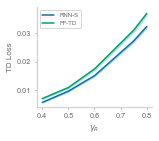

In [21]:
fig, ax = plt.subplots(figsize=(2.25,2))
g = sns.lineplot(
    x='Gamma', y='TD Loss',
    hue='Model', ax=ax,
    data=td_df,#[~((td_df['Model']=='RNN-S') & (td_df['Gamma']==0.5))],
    hue_order=['RNN-S', 'FF-TD'], palette=['C0', 'C2']
    )
g.legend_.set_title(None)
ax.set_ylabel('TD Loss')
ax.set_xlabel('$\gamma_R$')
plt.tight_layout()
plt.savefig('../figures/5f.png', dpi=300, transparent=True)